# Data Exploration & Cleaning


|Num|Field|Description|
|---|-----|----------|
|1 | school | student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira) |
|2 | sex | student's sex (binary: "F" - female or "M" - male)|
|3 | age | student's age (numeric: from 15 to 22) |
|4 | address | student's home address type (binary: "U" - urban or "R" - rural) |
|5 | famsize | family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3) |
|6 | Pstatus | parent's cohabitation status (binary: "T" - living together or "A" - apart)|
|7 | Medu | mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) |
|8 | Fedu | father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) |
|9 | Mjob | mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")|
|10| Fjob | father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")|
|11 | reason | reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")|
|12 | guardian | student's guardian (nominal: "mother", "father" or "other")|
|13 | traveltime | home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)|
|14 | studytime | weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)|
|15 | failures | number of past class failures (numeric: n if 1<=n<3, else 4)|
|16 | schoolsup | extra educational support (binary: yes or no)|
|17 | famsup | family educational support (binary: yes or no)|
|18 | paid | extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)|
|19 | activities | extra-curricular activities (binary: yes or no)|
|20 | nursery | attended nursery school (binary: yes or no)|
|21 | higher | wants to take higher education (binary: yes or no)|
|22 | internet | Internet access at home (binary: yes or no)|
|23 | romantic | with a romantic relationship (binary: yes or no)|
|24 | famrel | quality of family relationships (numeric: from 1 - very bad to 5 - excellent)|
|25 | freetime | free time after school (numeric: from 1 - very low to 5 - very high)|
|26 | goout | going out with friends (numeric: from 1 - very low to 5 - very high)|
|27 | Dalc | workday alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|28 | Walc | weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|29 | health | current health status (numeric: from 1 - very bad to 5 - very good)|
|30 | absences | number of school absences (numeric: from 0 to 93)|
|31 | G1 | first period grade (numeric: from 0 to 20) |
|31 | G2 | second period grade (numeric: from 0 to 20) |
|32 | G3 | final grade (numeric: from 0 to 20, output target)


* Note - Lots of ordinal variables. Estimates of conditional probabilities rather than conditional means.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from typing import Union, Dict, Optional, List

%matplotlib inline
sns.set(style='dark')

In [3]:
def annotate(axes:Union[np.ndarray, plt.Axes]):
    '''
    annotate a singular ax or a matrix of subplots ax
    inputs: 
        axes: singular matplotlib.pyplot ax or a matrix or ax
    '''
    def _annotate(ax: plt.Axes):
        for p in ax.patches:

            # establish text position
            _horizontal_position = p.get_x() + p.get_width() / 2
            _vertical_position = p.get_y() + p.get_height() / 2

            # define the value to add to the graph
            value = f'{int(p.get_height())}' 

            # add text
            ax.text(_horizontal_position, _vertical_position, value,  ha="center", fontsize=12) 
            pass
    
    if isinstance(axes, np.ndarray):
        for _, ax in np.ndenumerate(axes):
            _annotate(ax)
    else:
        _annotate(axes)
    pass


def test_hypothesis(alpha: float, pvalue: float) -> str:
    '''
    returns whether to reject or not reject an hypothesis.
    inputs:
        alpha: string, level of confidence (probability of rejecting the null hypothesis when in fact it is true)
        pvalue: string, probability of getting a more extreme value when the null hypothesis is true.
    '''
    if pvalue > alpha:
        return 'Fail to reject hypothesis'
    else:
        return 'Reject hypothesis'

In [4]:
RAW_PATH = '../data/raw/student-mat.csv'
raw = pd.read_csv(RAW_PATH, sep=';')
processed = raw.copy(deep=True)

# create a figures folders if it doesn't exist
os.chdir('..') # change cwd to root
cwd = os.getcwd()
figures = os.path.join(cwd, 'figures')

if not os.path.exists(figures):
    os.makedirs('figures')
    
os.chdir('notebooks') # change the current working directory back to the notebooks folder

In [5]:
raw.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

* There are 395 students in the dataset
* There are no missing values in the dataset
* There are no missing values in the dataset

In [7]:
target_columns = ['G1', 'G2', 'G3']
raw[target_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


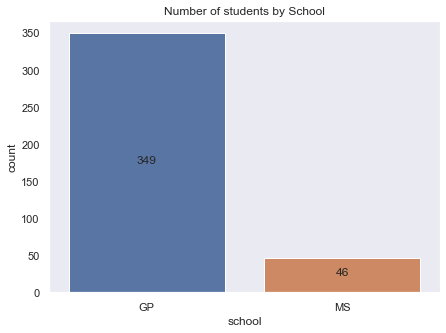

In [8]:
# look at the distribution of students between the schools
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=raw, x='school')
ax.set_title('Number of students by School')

# annotate the figure
annotate(ax)
plt.show()

* Gabriel Pereira school is represented 7~ times more than Mousinho da Silveira.

## Does Gender Affect the Final Grade

In [9]:
girls = raw.loc[raw['sex'] == 'F']
boys = raw.loc[raw['sex'] != 'F']

In [10]:
raw.groupby('sex').agg({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'}).rename(columns={
    'G1': 'First Semester',
    'G2': 'Second Semester',
    'G3': 'Final'
})

,First Semester,Second Semester,Final
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


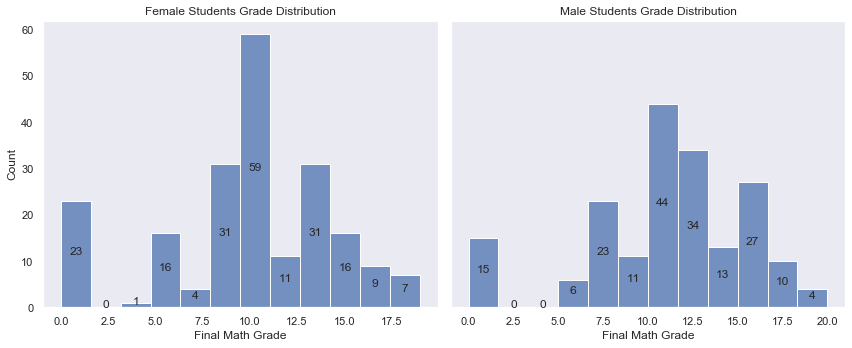

In [11]:
# look at the grade distribution between genders
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax = ax.ravel()

# add girls final grade histogram to figure
sns.histplot(data=girls, x='G3', ax=ax[0])
ax[0].set_title('Female Students Grade Distribution')
ax[0].set_xlabel('Final Math Grade')

# add boys final grade histogram to figure
sns.histplot(data=boys, x='G3', ax=ax[1])
ax[1].set_title('Male Students Grade Distribution')
ax[1].set_xlabel('Final Math Grade')

# annotate the figure
annotate(ax)
plt.tight_layout()
plt.savefig('../figures/gender_separeated_grade_hist.jpg')

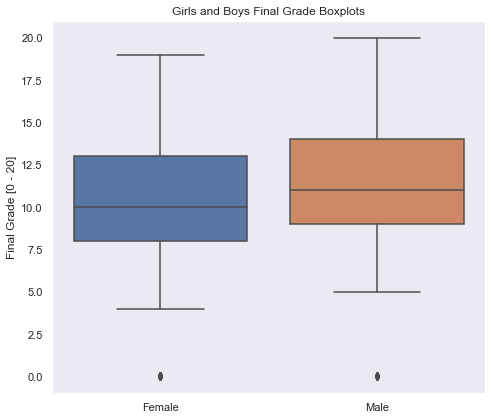

In [12]:
plt.figure(figsize=(7, 6))
ax = sns.boxplot(data=raw, x='sex', y='G3')

# update the labels
ax.set_title('Girls and Boys Final Grade Boxplots')
ax.set_xticklabels(['Female', 'Male'])
ax.set_ylabel('Final Grade [0 - 20]')
ax.set_xlabel('')

plt.tight_layout()
plt.savefig('../figures/gender_separeated_grade_boxplot.jpg')

### Are boys in these schools better than girls at math?

#### Possible Tests:
1. _T Test_ (parametric)
    - Population distributions are normal.
    - Samples have equal variances.
    - The two samples are independent.
    
    
2. _Mann-Whitney_ (non-parametric)
    - Observation is in one group or the other (it cannot be in both).
    - Ordinal measurement scale is assumed.

#### Testing Assumptions

* Variance
* Independence
* Normality

##### Variance Assumption

Levene's Homogeneity of Variances
* Null hypothesis: Equal population variances

In [13]:
ALPHA = 0.05
levene_stat, levene_pvalue = sps.levene(
    girls['G3'],
    boys['G3'],
    center= 'mean'
)

test_hypothesis(ALPHA, levene_pvalue)

'Fail to reject hypothesis'

##### Normality Assumption

Shapiro-Wilk 
  * Null hypothesis: Sample is normally distributed

In [14]:
f_stat, f_pvalue = sps.shapiro(girls['G3'])
m_stat, m_pvalue = sps.shapiro(boys['G3'])

print('Girls:', test_hypothesis(ALPHA, f_pvalue))
print('Boys:', test_hypothesis(ALPHA, m_pvalue))

Girls: Reject hypothesis
Boys: Reject hypothesis


The grades __do not meet__ the normality assumption. \
So, I will use Mann-Whitney to determine whether two independent samples are from a population with the same distribution. \
Since non of the observations repeat in both the male and female samples, the data meets Mann-Whitney's assumption of independence.

##### Do Girls Score Lower than Boys in Math?

Mann-Whitney
  * Null hypothesis: Same distribution. The median is the same between samples

In [15]:
# test the distributions of underlying samples
U, mann_pvalue = sps.mannwhitneyu(girls['G3'], boys['G3'], alternative='less')

# H0: girls do not score lower than boys in math
test_hypothesis(ALPHA, mann_pvalue)

'Reject hypothesis'

In [16]:
from IPython.display import Markdown as md
girls_median, boys_median = girls['G3'].median(), boys['G3'].median()
n_girls, n_boys = len(girls['G3']), len(boys['G3'])

md(f'''
    In the schools, Gabriel Pereira and Mousinho da Silveira
    the median final math grade for Females and Males were {girls_median} and {boys_median}, respectively. 
    The distributions in the two groups differed significantly.
        - Mann–Whitney (U) = {U}, 
        - Number of females = {n_girls},
        - Number of males = {n_boys},
        - {mann_pvalue} < 0.05
''')


    In the schools, Gabriel Pereira and Mousinho da Silveira
    the median final math grade for Females and Males were 10.0 and 11.0, respectively. 
    The distributions in the two groups differed significantly.
        - Mann–Whitney (U) = 17138.0, 
        - Number of females = 208,
        - Number of males = 187,
        - 0.020326513846277473 < 0.05


## Do students whose parents live together do better at school?

In [17]:
together = raw.loc[raw['Pstatus'] == 'T']
apart = raw.loc[raw['Pstatus'] == 'A']

In [18]:
raw.groupby('Pstatus').agg({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'}).rename(columns={
    'G1': 'First Semester',
    'G2': 'Second Semester',
    'G3': 'Final'
})

,First Semester,Second Semester,Final
Pstatus,,,
A,11.073171,11.170732,11.195122
T,10.889831,10.661017,10.324859


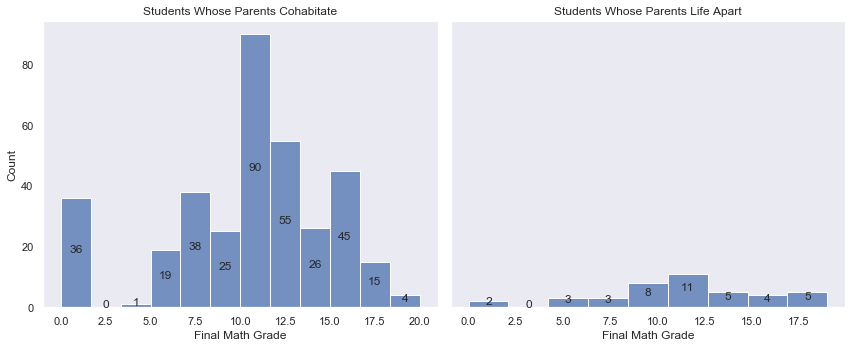

In [19]:
# look at the grade distribution between students whose parents live together and those that lvie apart
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax = ax.ravel()

# add cohabitating parents final grade histogram to figure
sns.histplot(data=together, x='G3', ax=ax[0])
ax[0].set_title('Students Whose Parents Cohabitate')
ax[0].set_xlabel('Final Math Grade')

# add single parents final grade histogram to figure
sns.histplot(data=apart, x='G3', ax=ax[1])
ax[1].set_title('Students Whose Parents Life Apart')
ax[1].set_xlabel('Final Math Grade')

# annotate the figure
annotate(ax)
plt.tight_layout()
plt.savefig('../figures/pstatus_separeated_grade_hist.jpg')

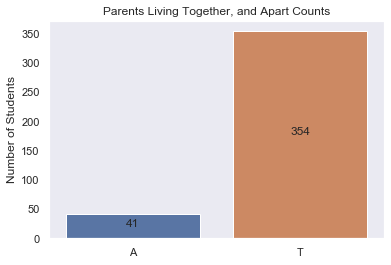

In [25]:
pstatus_ax = sns.countplot(data=raw, x='Pstatus')
pstatus_ax.set_title("Parents Living Together, and Apart Counts")
pstatus_ax.set_xlabel("")
pstatus_ax.set_ylabel("Number of Students")
annotate(pstatus_ax)

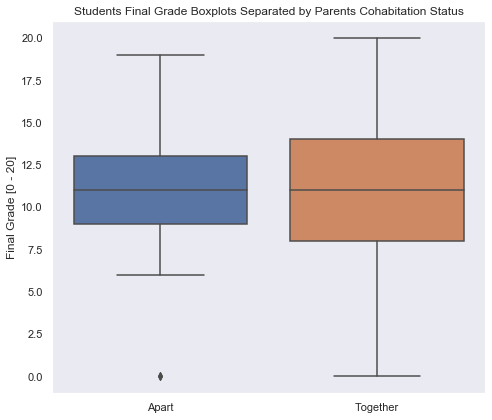

In [26]:
# review the student final grade distributions between students who live with both parents and those
# who parents are separated
plt.figure(figsize=(7, 6))
ax = sns.boxplot(data=raw, x='Pstatus', y='G3')

# update the labels
ax.set_title('Students Final Grade Boxplots Separated by Parents Cohabitation Status')
ax.set_xticklabels(['Apart', 'Together'])
ax.set_ylabel('Final Grade [0 - 20]')
ax.set_xlabel('')

plt.tight_layout()
plt.savefig('../figures/pstatus_separeated_grade_boxplot.jpg')

In [29]:
# test the distributions of underlying samples
U, mann_pvalue = sps.mannwhitneyu(apart['G3'], together['G3'], alternative='less')

# H0: students whose parents live apart do not score lower than students 
# whose parents live together overall
test_hypothesis(ALPHA, mann_pvalue)

'Fail to reject hypothesis'

In [31]:
apart_median_grade = apart["G3"].mean()
together_median_grade = together["G3"].mean()

md(f'''
    In the schools, Gabriel Pereira and Mousinho da Silveira
    the mean final grade for students whose parents live apart and those 
    whose parents live together were {apart_median_grade} and {together_median_grade}, respectively. 
    The distributions in the two groups did not differ significantly.
        - Mann–Whitney (U) = {U}, 
        - Number of students with parents living apart = {len(apart["G3"])},
        - Number of students with parents co-habitating = {len(together["G3"])},
        - {mann_pvalue} > 0.05
''')


    In the schools, Gabriel Pereira and Mousinho da Silveira
    the median final grade for students whose parents live apart and those 
    whose parents live together were 11.0 and 11.0, respectively. 
    The distributions in the two groups did not differ significantly.
        - Mann–Whitney (U) = 7862.5, 
        - Number of students with parents living apart = 41,
        - Number of students with parents co-habitating = 354,
        - 0.8103835716667813 > 0.05


## Compare the Grades Between Students That Attend After-School Acitivities and Those That Don't

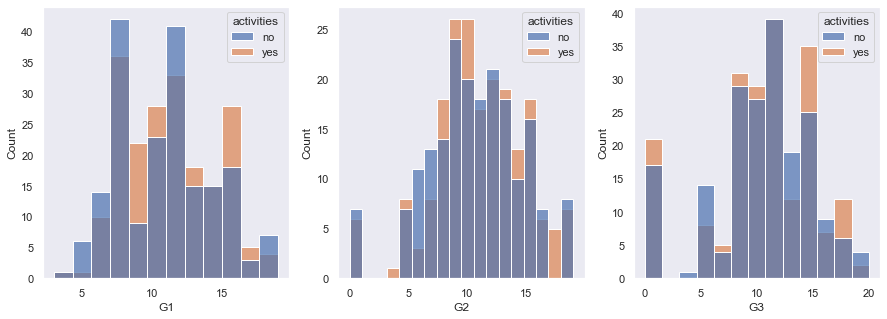

In [53]:
# look at the grade distribution among those with after school activities
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax = ax.ravel()
for i in range(3):
    sns.histplot(data=raw, x=target_columns[i], hue='activities', ax=ax[i], alpha=0.7)

* Do children that have afterschool acitivties do better at math?

In [40]:
raw.groupby('activities').agg({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})

,G1,G2,G3
activities,,,
no,10.716495,10.520619,10.340206
yes,11.094527,10.900498,10.487562


In [42]:
active_students = raw.loc[raw['activities'] == 'yes']
no_activity_students = raw.loc[raw['activities'] == 'no']

# test the distributions of underlying samples
U, mann_pvalue = sps.mannwhitneyu(active_students['G3'], no_activity_students['G3'])

# H0: students that attend after school activities score the same as students that
# do not attend after school activities
print(test_hypothesis(ALPHA, mann_pvalue))

md(f'''
    In the schools, Gabriel Pereira and Mousinho da Silveira
    the mean final grade for students that attend after school activities and those that dont
    is {active_students['G3'].mean()} and {no_activity_students['G3'].mean()}, respectively. 
    The distributions in the two groups did not differ significantly.
        - Mann–Whitney (U) = {U}, 
        - Number of students attending after school activities = {len(active_students["G3"])},
        - Number of students that do not attend after school activities = {len(no_activity_students["G3"])},
        - {mann_pvalue} > 0.05
''')

Fail to reject hypothesis



    In the schools, Gabriel Pereira and Mousinho da Silveira
    the mean final grade for students that attend after school activities and those that dont
    is 10.487562189054726 and 10.34020618556701, respectively. 
    The distributions in the two groups did not differ significantly.
        - Mann–Whitney (U) = 18912.0, 
        - Number of students attending after school activities = 201,
        - Number of students that do not attend after school activities = 194,
        - 0.30242913731309184 > 0.05


## Preparing Data for Modeling

* Binary
    1. schoolsup
    2. famsup
    3. paid
    4. activities
    5. nursery
    6. higher
    7. internet
    8. romantic
        
* Categorical
    1. Medu (numeric)
    2. Fedu (numeric)
    3. Mjob (nominal)
    4. Fjob (nominal)
    5. famrel (numeric)
    6. freetime (numeric)
    7. goout (numeric)
    8. Dalc (numeric)
    9. Walc (numeric)
    10. health (numeric)

In [44]:
binary_columns = [
    'schoolsup', 'famsup', 'paid', 'activities', 
    'nursery', 'higher', 'internet', 'romantic'
]

binary = lambda x: 1 if x == 'yes'else 0
fem = lambda x: 1 if x == 'F' else 0

# convert additional school support to binary indicator
processed['schoolsup'] = raw['schoolsup'].map(lambda status: binary(status))

# convert additional parental support to binary indicator
processed['famsup'] = raw['famsup'].map(lambda family: binary(family))

# convert additional paid support to binary indicator
processed['paid'] = raw['paid'].map(lambda paid: binary(paid))

# convert after school activities to binary indicator
processed['activities'] = raw['activities'].map(lambda activity: binary(activity))

# convert attendance at nursary school to binary indicator
processed['nursery'] = raw['nursery'].map(lambda nursery: binary(nursery))

# convert aspiration towards higher education to binary indicator
processed['higher'] = raw['higher'].map(lambda higher: binary(higher))

# convert access to internet at home to binary indicator
processed['internet'] = raw['internet'].map(lambda internet: binary(internet))

# convert assigned sex at birth to binary indicator
processed['sex'] = raw['sex'].map(lambda sex: fem(sex))

# convert romantic relationship to binary indicator
processed['romantic'] = raw['romantic'].map(lambda romantic: binary(romantic))

try:
    # convert parental cohabitation status to binray indicator
    processed['divorced'] = raw['Pstatus'].map(lambda status: 1 if status.lower() == 'a' else 0)
    processed = processed.drop('Pstatus', axis=1)

    # convert address to urban living indidactor
    processed['urban'] = raw['address'].map(lambda address: 1 if address.lower() == 'u' else 0)
    processed = processed.drop('address', axis=1)

    # convert family size to small family indicator
    processed['smallfam'] = raw['famsize'].map(lambda address: 1 if address.lower() == 'le3' else 0)
    processed = processed.drop('famsize', axis=1)
    
    # dummy reason
    reason = pd.get_dummies(raw['reason'], prefix='reason').drop(['reason_other'], axis=1) 
    processed = pd.concat([processed, reason], axis=1)
    processed = processed.drop('reason', axis=1)
    
    # dummy parent occupation
    jobs = pd.get_dummies(raw[['Mjob', 'Fjob']]).drop(['Mjob_other', 'Fjob_other'], axis=1) 
    processed = pd.concat([processed, jobs], axis=1)
    processed = processed.drop(['Mjob', 'Fjob'], axis=1)

    # dummy child's guardian
    guardian = pd.get_dummies(raw['guardian']).drop('other', axis=1)
    processed = pd.concat([processed, guardian], axis=1)
    processed = processed.drop(['guardian'], axis=1)

    # dummy variable numeric columns
    categorical_numeric = [
        'Medu', 'Fedu', 'famrel', 'freetime', 'traveltime',
        'goout', 'Dalc', 'Walc', 'health', 'studytime'
    ]
    numeric = pd.get_dummies(raw[categorical_numeric], columns=categorical_numeric)
    processed = pd.concat([processed, numeric], axis=1)
    processed = processed.drop(categorical_numeric, axis=1)
    
    processed = processed.drop('school', axis=1) # not enough students from MS
    processed = processed.drop('age', axis=1) # i don't want to explore that option

except KeyError as e:
    print(str(e))
    
processed.head()

,sex,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,...,Walc_5,health_1,health_2,health_3,health_4,health_5,studytime_1,studytime_2,studytime_3,studytime_4
0,1,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
2,1,3,1,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0
3,1,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,1,0
4,1,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [224]:
pd.get_dummies(raw['reason'], prefix='reason').drop(['reason_other'], axis=1) 

,reason_course,reason_home,reason_reputation
0,1,0,0
1,1,0,0
2,0,0,0
3,0,1,0
4,0,1,0
...,...,...,...
390,1,0,0
391,1,0,0
392,1,0,0
393,1,0,0


In [47]:
X = processed.drop(['G3'], axis=1)
y = processed['G3'].copy(deep=True)

X = sm.add_constant(X) 

#fitting the variables to model
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     29.66
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.10e-104
Time:                        11:28:06   Log-Likelihood:                -774.72
No. Observations:                 395   AIC:                             1685.
Df Residuals:                     327   BIC:                             1956.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5599      0.330     -1.696      0.091      -1.209       0.089
sex                  -0.1155      0.243     -0.474      0.636      -0.594       0.363
failures             -0.2079      0.166     -1.253      0.211      -0.534       0.119
schoolsup             0.5572      0.318      1.751      0.081      -0.069       1.183
famsup                0.2421      0.228      1.063      0.288      -0.206       0.690
paid                  0.1062      0.233      0.456      0.649      -0.352       0.564
activities           -0.3637      0.211     -1.722      0.086      -0.779       0.052
nursery              -0.1500      0.264     -0.569      0.570      -0.669       0.369
higher                0.0920      0.512      0.180      0.857      -0.915       1.099
internet             -0.0013      0.296     -0.004      0.997      -0.583       0.580
romantic             -0.4909      0.229     -2.141      0.033      -0.942      -0.040
absences              0.0388      0.013      2.878      0.004       0.012       0.065
G1                    0.2048      0.064      3.205      0.001       0.079       0.331
G2                    0.9386      0.055     17.191      0.000       0.831       1.046
divorced              0.0520      0.351      0.148      0.882      -0.638       0.742
urban                -0.0217      0.276     -0.079      0.937      -0.564       0.521
smallfam              0.1622      0.237      0.684      0.495      -0.305       0.629
reason_course        -0.4303      0.386     -1.114      0.266      -1.190       0.330
reason_home          -0.6470      0.405     -1.598      0.111      -1.444       0.150
reason_reputation    -0.2768      0.404     -0.685      0.494      -1.072       0.518
Mjob_at_home         -0.1207      0.341     -0.354      0.723      -0.791       0.550
Mjob_health          -0.4466      0.458     -0.976      0.330      -1.347       0.454
Mjob_services        -0.0600      0.282     -0.213      0.832      -0.615       0.495
Mjob_teacher         -0.4118      0.421     -0.978      0.329      -1.240       0.416
Fjob_at_home          0.0360      0.489      0.074      0.941      -0.926       0.998
Fjob_health           0.5122      0.532      0.963      0.336      -0.534       1.559
Fjob_services        -0.1145      0.256     -0.448      0.655      -0.618       0.389
Fjob_teacher          0.0279      0.469      0.060      0.953      -0.894       0.950
father                0.2658      0.452      0.588      0.557      -0.624       1.155
mother                0.4294      0.417      1.031      0.303      -0.390       1.249
Medu_0                0.7159      0.962      0.744      0.457      -1.177       2.608
Medu_1               -0.5863      0.349     -1.679      0.094      -1.274       0.101
Medu_2               -0.5593      0.305     -1.835      0.067      -1.159

In [46]:
X1 = processed.drop(['G3', 'G1', 'G2'], axis=1)
y = processed['G3'].copy(deep=True)

X1 = sm.add_constant(X1) 

#fitting the variables to model
results = sm.OLS(y,X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     2.690
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           4.74e-09
Time:                        11:27:56   Log-Likelihood:                -1077.0
No. Observations:                 395   AIC:                             2286.
Df Residuals:                     329   BIC:                             2549.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.4658      0.647      5.353      0.000       2.192       4.740
sex                  -1.1568      0.517     -2.239      0.026      -2.173      -0.140
failures             -1.7838      0.339     -5.256      0.000      -2.451      -1.116
schoolsup            -0.8653      0.663     -1.306      0.192      -2.169       0.438
famsup               -0.8493      0.481     -1.765      0.078      -1.796       0.097
paid                  0.3564      0.497      0.717      0.474      -0.621       1.334
activities           -0.4905      0.452     -1.084      0.279      -1.381       0.400
nursery               0.0176      0.565      0.031      0.975      -1.094       1.129
higher                1.4831      1.093      1.357      0.176      -0.667       3.633
internet              0.6872      0.631      1.089      0.277      -0.554       1.929
romantic             -1.4084      0.485     -2.905      0.004      -2.362      -0.455
absences              0.0524      0.029      1.814      0.071      -0.004       0.109
divorced              0.2438      0.750      0.325      0.745      -1.231       1.719
urban                 0.4881      0.590      0.827      0.409      -0.672       1.649
smallfam              0.9688      0.506      1.914      0.056      -0.027       1.964
reason_course        -1.0412      0.824     -1.264      0.207      -2.661       0.579
reason_home          -0.6991      0.864     -0.809      0.419      -2.399       1.001
reason_reputation    -0.3039      0.860     -0.353      0.724      -1.996       1.388
Mjob_at_home          0.4006      0.725      0.553      0.581      -1.025       1.827
Mjob_health           0.5965      0.974      0.613      0.541      -1.319       2.512
Mjob_services         0.9381      0.596      1.574      0.117      -0.235       2.111
Mjob_teacher         -1.4957      0.897     -1.668      0.096      -3.260       0.268
Fjob_at_home         -0.0871      1.043     -0.084      0.933      -2.139       1.965
Fjob_health           0.7508      1.140      0.659      0.511      -1.491       2.993
Fjob_services         0.1549      0.547      0.283      0.777      -0.921       1.231
Fjob_teacher          1.4693      0.991      1.482      0.139      -0.481       3.420
father                0.0443      0.967      0.046      0.963      -1.858       1.947
mother               -0.1327      0.891     -0.149      0.882      -1.886       1.621
Medu_0                3.8723      2.052      1.887      0.060      -0.164       7.909
Medu_1               -1.0132      0.746     -1.359      0.175      -2.480       0.454
Medu_2               -0.5180      0.653     -0.793      0.428      -1.802       0.766
Medu_3               -0.0605      0.662     -0.091      0.927      -1.362       1.241
Medu_4                1.1852      0.810      1.464      0.144      -0.408